# Chapter 06 Exercises

## Name goes here

### Date

In [1]:
# Insert the Python Libraries You Will Need Here:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Q1) Implementing the Romer Model using Python

Unlike the Solow Model, the Romer model incorporates the difference between ideas and ojects into the model. Ideas play a big role in sustained growth as illustrated by this homework.

### Part I

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Unknowns/endogenous variables:     | $Y_t$, $A_t$, $L_{yt}$, $L_{at}$| 
| Output Production Function: | $Y_t = A_tL_{yt}$|
| Idea Production Function:   | $\Delta A_{t+1}=\bar{z}A_tL_{at}$ |
| Resource Constraint: | $L_{yt}+L_{at}=\bar{L}$ |
| Allocation of Labor: | $L_{at} = \bar{\ell}\bar{L}$ |
| Parameters: | $\bar{z}, \bar{L}, \bar{\ell}, \bar{A_0}$ |

Suppose the parameters of the Romer model take the following values: $\bar{A_0} = 100$, $\bar{\ell} = 0.10$, $\bar{z} = \frac{1}{500}$, and $\bar{L} = 100$.

__(a):__ What is the growth rate of output per person in this economy? Please show your work.

__Answer:__

We know from the Romer model that the growth rate is constant and equal to $\bar{g} = \bar{z}\bar{\ell}\bar{L}$ (pg. 151 of textbook). Therefore, 

\begin{align*}
\bar{g} &= \bar{z}\bar{\ell}\bar{L}\\
&= \left(\frac{1}{500}\right)(0.10)(100)\\
&= .02
\end{align*}



__(b):__ What is the initial level of output per person? See equation 6.9 (pg. 149 of the textbook)

In [2]:
# Model Parameters

A0 = 100
l_bar = 0.1
z_bar = 1/500
L_bar = 100

# Output per Person

y = A0 * (1 - l_bar) * (1 + z_bar*L_bar*l_bar)**0
print('Answer: ', y)


Answer:  90.0


__(c):__ Use the Romer framework to model output per person over 100 years and make two time series plots, one in the level scale and another using the ratio scale. (_Hint_: We did exactlythe same thing in the homework for Chapter 5. See Q5) part (c))

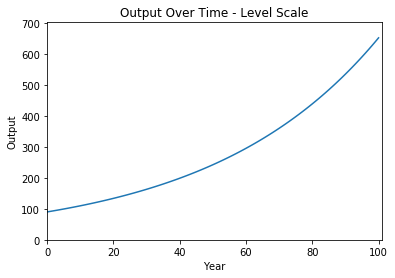

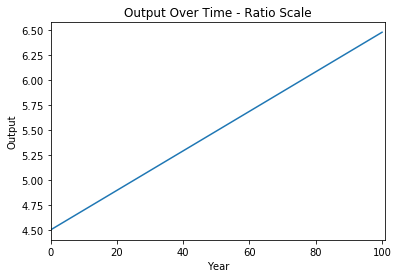

In [3]:
# Model Parameters

A0 = 100
l_bar = 0.1
z_bar = 1/500
L_bar = 100


# Use a lambda function for output and call it using a for loop
# Defining the lambda function. This is the same as using def but shorter.
# Using a lambda function is great for short formulas.
output = lambda A0, l_bar, L_bar, t: A0 * (1 - l_bar) * ((1 + z_bar*L_bar*l_bar)**t)


##############################################################################
# Make a for loop to calculate the production for each year

output_array = np.zeros(101) # An array full of zeros, this is storage for data in the loop

# Using a for loop to calcuate the rest of the years 1-100. 
# Remember when using range(0:100) endpoints are not included, thus it will not reach year 100 unless you do
# range(0, 101)
for i in range(0,101):
    t = i
    output_array[i] = output(A0, l_bar, L_bar, t)
###############################################################################
# Make the plots
year = np.arange(0, output_array.size, 1) # This is just used to make a nice array for the x axis

plt.plot(year, output_array)
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Level Scale')
plt.ylim(0, np.max(output_array)+50)  
plt.xlim(0, year.size) 
plt.show()


plt.plot(year, np.log(output_array))
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Ratio Scale')
plt.xlim(0, year.size) 
plt.show()


__(d):__ Suppose the share or workers dedicated to research were to double at $t=50$. Please answer __(a)__ and __(b)__ using this new information? Add this change to the graphs of part __(c)__. You will now have two 100-year paths for each variable on one plot. Make sure your time series for this question has a different color and that your plot includes a legend indicating which parameter values belong to which variable path. Please discuss the effect on output generated by the change in the allocation of labor in this economy.

The initial growth rate at t=0 is 2%
The new growth rate would be at t=50: 4.00%
Inital Level of Output:  90.0


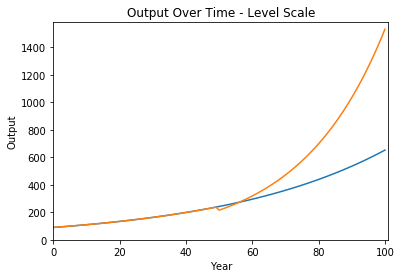

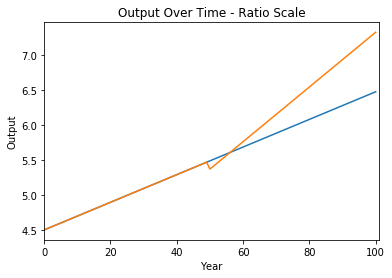

In [4]:
# Defining new research labor share

l_bar2 = (l_bar * 2) 

##########################################################################
# Part (a): find the growth rate
##########################################################################
g_bar2 = z_bar * l_bar2 * L_bar
print('The initial growth rate at t=0 is 2%')
print('The new growth rate would be at t=50:', '{0:.2%}'.format(g_bar2))

##########################################################################
# Part (b): The initial level of output per person
##########################################################################
print('Inital Level of Output: ', output(A0, l_bar, L_bar, 0))

##########################################################################
# Part (c): Make a plot of 100 years of output
##########################################################################

output_array2 = np.zeros(101)

for i in range(0, 101):
    t = i
    if t < 50:
        output_array2[i] = output(A0, l_bar, L_bar, t)
    else:
        A50=A0 * (1+l_bar * L_bar * z_bar) ** 50
        output_array2[i] = output(A50, l_bar2, L_bar, t-50)

        
plt.plot(year, output_array, label = 'Growth = 2%')
plt.plot(year, output_array2, label = 'Growth = 4%')
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Level Scale')
plt.ylim(0, np.max(output_array2)+50)  
plt.xlim(0, year.size) 
plt.show()

plt.plot(year, np.log(output_array), label = 'Growth = 2%')
plt.plot(year, np.log(output_array2))
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Ratio Scale')
plt.xlim(0, year.size) 
plt.show()


__Answer__ 

There are two effects, a level effect at the year of the change and a growth effect for every year afterwards. The level effect, although significant, pales in comparison to the eventual total effect that a doubling of the rate of growth of output has on the level of output. The amount of output sacrificed during year 50 is rougly 27. The ending output difference between the two scenarios is 878. Adding up all the years, both of sacrificed outpupt and gained output we end up with a balance of 13,262.83. So, changing the rate of growth of TFP was absolutely worth it! (See calculations below) 

Output sacrificed during period 50:
    Output Difference
50          -26.91588
Output gained at the end of 50 years, period 100:
     Output Difference
100         878.242955
Cumulative output gain:
13,262.83


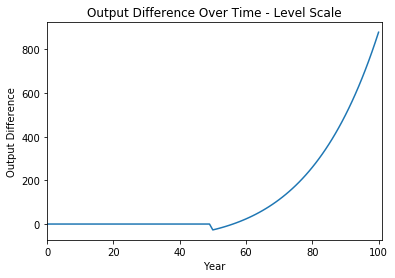

In [5]:
df = pd.DataFrame({'Time':t, 
                   'Output Difference':output_array2-output_array}, 
                    columns=['Time', 'Output Difference'])


print('Output sacrificed during period 50:')
print(df.loc[[50], ['Output Difference']])
print('Output gained at the end of 50 years, period 100:')
print(df.loc[[100], ['Output Difference']])
print('Cumulative output gain:')
print('{:,.2f}'.format(df['Output Difference'].sum()))

plt.plot(df.loc[:,'Output Difference'])
plt.xlabel('Year')
plt.ylabel('Output Difference')
plt.title('Output Difference Over Time - Level Scale')
plt.xlim(0, year.size) 
plt.show()



### Part II

Now suppose the parameters of the model take the following values $\bar{A_0} = 100$, $\bar{\ell} = 0.06$, $\bar{z} = \frac{1}{3000}$, and $\bar{L} = 1000$. Use Python to answer __(a)__ through __(c)__.

__(a):__ What is the growth rate of output per person in this economy? What is the initial level of output per person?

In [7]:
A0 = 100
l_bar = 0.06
z_bar = 1/3000
L_bar = 1000

g = z_bar * l_bar * L_bar
print('The growth rate is: ', '{0:.2%}'.format(g))
print('Inital Level of Output: ',  output(A0, l_bar, L_bar, 0))


The growth rate is:  2.00%
Inital Level of Output:  94.0


__(b):__  Use the Romer framework to model output per person over 100 years and make a time series plot.

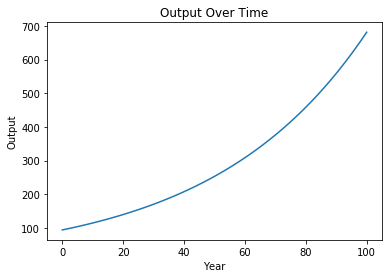

In [8]:
A0 = 100
l_bar = 0.06
z_bar = 1/3000
L_bar = 1000

output_array3 = np.zeros(101)

for i in range(0, 101):
    t = i
    output_array3[i] = output(A0, l_bar, L_bar, t)

plt.plot(year, output_array3)
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time')
plt.show()

__(c):__ Now add to your plot from part __(b)__ the following changes one at a time: a doubling of the stock of knowledge $\bar{A}_{20}$ at $t=20$, a doubling of the research share $\bar{\ell}$ at $t=40$, a doubling of research productivity $\bar{z}$ at $t=60$, and a doubling of the population $\bar{L}$ at $t=80$. You should now have a total of 5 separate time series on the same plot. Make sure each line has a different color and your plot has a legend indicating which path represents which change. Please, make sure to include the growth rate of output per person after the change in the legend for each scenario.

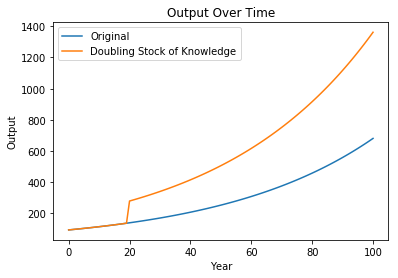

In [12]:
#################################################################################
# A doubling of inital stock of knowledge at t  = 20 
#################################################################################

output_array4 = np.zeros(101)
A_new=(A0 * (1+l_bar * L_bar * z_bar) ** 20)*2

for i in range(0, 101):
    t = i
    if t < 20:
        output_array4[i] = output(A0, l_bar, L_bar, t)
    else:
        output_array4[i] = output(A_new, l_bar, L_bar, t-20)


#################################################################################
# A doubling of research productivity at t = 60
#################################################################################     
        
output_array5 = np.zeros(101)
A60=(A0 * (1+l_bar * L_bar * z_bar) ** 60)
z_bar = 2/500
for i in range(0, 101):
    t = i
    if t < 60:
        output_array5[i] = output(A0, l_bar, L_bar, t)
    else:
        output_array5[i] = output(A60, l_bar, L_bar, t-60)      
        
        
plt.plot(year, output_array3, label = 'Original')
plt.plot(year, output_array4, label = 'Doubling Stock of Knowledge')
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time')
plt.legend()
plt.show()

In [ ]:
#################################################################################
# A doubling of the research share at t = 40
#################################################################################
A_0 = 100
l = .06
z = 1/3000
L = 1000

output_array3 = np.zeros(101)


for i in range(0, 101):
    t = i
    if i == 40:
        l = l * 2
        g = z * l * L
    output_array3[i] = output(A_0, l, g, t)

#################################################################################
# A doubling of research productivity at t = 60
#################################################################################
A_0 = 100
l = .06
z = 1/3000
L = 1000

output_array4 = np.zeros(101)
    
for i in range(0, 101):
    t = i
    if i == 60:
        z = z * 2
        g = z * l * L
    output_array4[i] = output(A_0, l, g, t)

#################################################################################
# A doubling of population at t = 80
#################################################################################
A_0 = 100
l = .06
z = 1/3000
L = 1000
output_array5 = np.zeros(101)
    
for i in range(0, 101):
    t = i
    if i == 80:
        L = L * 2
        g = z * l * L
    output_array5[i] = output(A_0, l, g, t)

    
# Make a plot of all 5 time series





#plt.plot(year, output_array3, label = 'Original')
#plt.plot(year, output_array4, label = 'Doubling Stock of Knowledge')
#plt.plot(year, output_array5, label = 'Doubling Research Share')
#plt.plot(year, output_array6, label = 'Doubling Research Productivity')
#plt.plot(year, output_array7, label = 'Doubling of the Population')
#plt.legend()
#plt.xlabel('Year')
#plt.ylabel('Output')
#plt.title('Output Over Time')
#plt.show()

__(d):__ If you could advocate one of the changes considered in part __(c)__, which would you choose? White a paragraph arguing for your choice.

__Answer:__ 

Doubling the population had the greatest impact under current conditions of the economy thus if more output is desired, one should advocate for this choice. 

## Q2) Intellectual property products (a FRED question)

In 2015, the U.S. National Income Accounts began to "count" intellectual property products—such as R&D, computer software, books, music, and movies—explicitly as investment. More correctly, they had previously assumed these products were an intermediate good that depreciated fully when used to produce some other final good, but now they are included as a part of investment and GDP. Examine the data on investment in intellectual property products (IPP).

__(a):__ Using the FRED database, download the data for the series with label "Y001RE1Q156NBEA" and create a time series plot. Follow the steps below to complete this. __Don't skip steps or this won't work!__

   * In past assignments data was posted on Git Hub for you to download. This time will be different. You will be importing the data straight from a file on your computer.
   
   * Begin by downloading the data to your computer from FRED as instructed in part __(a)__ by selecting download and then selecting the CSV (data) option on the FRED website. The file should download with the name "Y001RE1Q156NBEA.csv".
   
   * Once you have downloaded the data you will need to locate where the data was downloaded. This will typically be in your Downloads folder on your computer. Take the .csv file from your Downloads and move it to a different folder such as a folder for this class.
   
   * A file path to such a folder for this class __in Windows__ might look like `C:\Users\...\Econ_381`. __For Mac__, the file path might be `~/Documents/.../Econ_381`. __Note file paths are case sensitive!__   
   
   * You will use Python's Pandas package to import the data using the read csv function with the appropriate Windows or Mac file path. __Don't forget to use quotes around your file path in the funcion.__ The final file path needed to import the data might look something like this: `C:/Users/.../Econ 381/Y001RE1Q156NBEA.csv`. __Note!__ the slash is facing a different direction than in bullet four for Windows users, the slash must face forward when the file path is placed inside the read_csv() function. Alternatively you could use an "r" before the file path, like:   
   `pd.read_csv(r"C:/Users/.../Econ 381/Y001RE1Q156NBEA.csv")` if you don't want to change the slashes.
   
   * If your Pandas data import does not work you may have misspelled a word, not capitalized something that should be, put an unnecessary space, or the file path you have does not lead to where the .csv file is actually stored. Check all these things if it does not work.

__(b):__ What has happened to the share of GDP devoted to investment in IPP over the last 60 years. What might explain this change?

In [ ]:

data = pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/Y001RE1Q156NBEA.csv')
data.plot()
plt.xlabel('Time period')
plt.ylabel('% GDP Devoted to IPP Investment')
plt.show()

__Answer:__

The beginning of the question notes that intellectual property products are products such as R&D, computer software, books, music, and movies. The first year in the time series is in 1947. By recognizing what intellectual property is, a logical explanation would be that there was not computer software in 1947. Further, movies and music where no where near as widely available as they are today. With the advancements of technology, the share of IPP as a percent of GDP has risen a lot since 1947.

__(c):__ Lets use the share of GDP devoted to investment in IPP as a proxy for the amount of effort that goes into research and development in a country, or $\bar{\ell}$. The assumption in the Romer model is that the research share is constant. Please relax this assumption and incorporate a dynamic research share parameter $\bar{\ell}_{t}$ into the Romer model. Use the data you obtained in part __(b)__ to create a series for your new dynamic variable $\bar{\ell}_{t}$ and simluate 100 years of data using $\bar{A_0} = 100$, $\bar{z} = \frac{1}{3000}$, $\alpha=1/3$ and $\bar{L} = 1000$. Please create a plot of GDP per capital and the growth of GPD per capital over 100 years.

In [ ]:
# Insert Python Code Here

# Using the data from the FRED data frame we can assign this to l
l = data['Y001RE1Q156NBEA']

# Create a vectors of zeros to be filled in later
new_output = np.zeros(101)
growth = np.zeros(101)

# Declare the new variables from information given
A_0 = 100
z = 1/3000
L = 1000

# Using a for loop calculate output
for i in range(0, 101):
    t = i
    growth[i] = z * l[i] * L
    new_output[i] = output(A_0, l[i], growth[i], t)

# Create a plot of output
    
plt.plot(year, new_output)
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time')
plt.show()

# Create a plot of growth
plt.plot(year, growth)
plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Growth')
plt.show()
    


__(d)__ Compare the growth rate of GDP per capita under this new assumption versus the fixed parameter version of the model.  What are the strenghts and weaknesses of each model? Please justify your answers.

__Answer:__

The strength is that it allows for a more free moving and dynamic model. It better represents the variance we have in the real world where things are changing all the time.